In [25]:
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from src.game import discrete_lines

## Matplotlib stuff

In [26]:
def mk_rectangles(ax, xy_list):
    for xy in xy_list:
        rect = patches.Rectangle(xy, 1, 1, facecolor='k', alpha=0.1)
        ax.add_patch(rect)

def mk_grid(xy_list):
    fig, ax = plt.subplots()
    mk_rectangles(ax, xy_list)
    plt.xlim([0, 80])
    plt.ylim([0, 60])
    ax.set_xticks(np.linspace(0,80,81))
    ax.set_yticks(np.linspace(0,60,61))
    plt.grid()
    plt.show()

## Utils

In [27]:
def mk_all_edge_xy(dims):
    xy_list = []
    for x in range(dims[0]):
        for y in range(dims[1]):
            if x == 0 or x == dims[0]-1 or y == 0 or y == dims[1]-1:
                xy = [x, y]
                xy_list.append(xy)
    return np.array(xy_list)


In [28]:
def times_per_sec(func, *args, **kwargs):
    iters = 1000
    t0 = time.time()
    for _ in range(iters):
        func(*args, **kwargs)
    t1 = time.time()
    print(iters/(t1-t0))

## Geometry

## Experiments

In [29]:
# all_xy = mk_all_edge_xy(dims)
# mult = 5

dims = (80, 60)
xy = [40, 30]

rads = np.linspace(0, 2*np.pi, 360, endpoint=False)
circ = np.array((np.sin(rads), np.cos(rads))).T*max(dims)

start = np.repeat(np.array([[0, 0]]), len(circ), axis=0)
end = circ
XY_LIST = discrete_lines.bresenham_numpy(start, circ) + xy
XY_LIST = XY_LIST.reshape(-1, start.shape[-1])


(360, 80, 2)
(28800, 2)


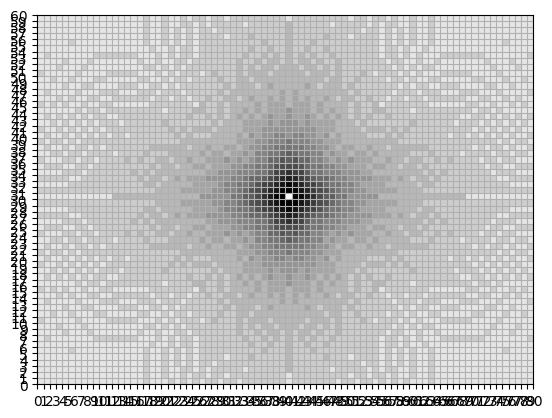

In [30]:
mk_grid(XY_LIST)
